# Object detection model based on detecting the anki robot, detecting the movements and the features of the anki vector robot


## First off lets unzip the file and upload it to the google colab directory!

In [2]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("vectorCompleteDataset.v7-raw.tensorflow")

os.listdir("vectorCompleteDataset.v7-raw.tensorflow")


Saving vectorCompleteDataset.v7-raw.tensorflow.zip to vectorCompleteDataset.v7-raw.tensorflow.zip


## Now lets explore the files in the directory specifically the train directory

In [3]:
!ls vectorCompleteDataset.v7-raw.tensorflow/

README.dataset.txt  README.roboflow.txt  test  train  valid


In [5]:
for dirpath, dirnames, files in os.walk("vectorCompleteDataset.v7-raw.tensorflow"):
  print(f"There are {len(dirnames)} directories and {len(files)} images in '{dirpath}'.")

There are 3 directories and 2 images in 'vectorCompleteDataset.v7-raw.tensorflow'.
There are 0 directories and 31 images in 'vectorCompleteDataset.v7-raw.tensorflow/test'.
There are 0 directories and 213 images in 'vectorCompleteDataset.v7-raw.tensorflow/train'.
There are 0 directories and 62 images in 'vectorCompleteDataset.v7-raw.tensorflow/valid'.


In [8]:
import pathlib
import numpy as np

train_data_dir = pathlib.Path("vectorCompleteDataset.v7-raw.tensorflow/train")
image_files = np.array(sorted([image.name for image in train_data_dir.glob('*')]))
print(image_files)

['_annotations.csv'
 'picture101_jpeg.rf.5829383b33495012c702b2eb39d703fd.jpg'
 'picture102_jpeg.rf.1ce61e9d8d046b678a7364719a6bfda8.jpg'
 'picture105_jpeg.rf.1ed123764ff3bfe9111b54731bf7832e.jpg'
 'picture106_jpeg.rf.f9f84b02dfc15952de57550e4f113ec7.jpg'
 'picture107_jpeg.rf.ce05d78af9e786e5070a44545c76ef35.jpg'
 'picture108_jpeg.rf.7b29ff1ff5166c0ae0dc444e85ec390c.jpg'
 'picture109_jpeg.rf.5bff86d1b4d552a4dfb0561cacfb8cee.jpg'
 'picture10_jpeg.rf.a263de301ee2b1326d8b88736b53dc48.jpg'
 'picture111_jpeg.rf.ee3fd68b879d4b4732234bb50c044892.jpg'
 'picture112_jpeg.rf.20ee2b76f7e87cbb0f4586c8ddf8b824.jpg'
 'picture113_jpeg.rf.f86ae9ceb5cf4ced3a2863fb57a479bb.jpg'
 'picture114_jpeg.rf.2b0568196ab6d13eb379beef13862fdb.jpg'
 'picture115_jpeg.rf.d5df0c42128bd88fc69c3cb9dc15c2b3.jpg'
 'picture116_jpeg.rf.26fb25e82c6d0afc7f95b907db70635f.jpg'
 'picture117_jpeg.rf.84700a2ae1d1462c6ecd880be7f70e34.jpg'
 'picture11_jpeg.rf.1e809f0203646d527b00516f185241d0.jpg'
 'picture120_jpeg.rf.6675564b7bef8aa4d

## Now let us see the image, its shape and the data type of the image data!!

[np.str_('picture293_jpeg.rf.752cbd656c26fa0b8f3a6e383093f9e1.jpg')]
(360, 640, 3)
uint8


(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

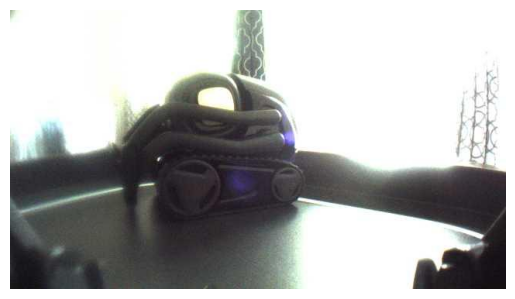

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_image = random.sample(list(image_files), 1)

img = mpimg.imread(train_data_dir/random_image[0])
print(random_image)
print(img.shape)
print(img.dtype)
plt.imshow(img)
plt.axis("off")

## Afterward let us get the gist of the blobs of data inside the image we randomly choose to get the idea inside that image!

In [22]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(360, 640, 3), dtype=uint8, numpy=
array([[[169, 185, 158],
        [165, 181, 154],
        [173, 189, 163],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[173, 189, 162],
        [171, 187, 160],
        [178, 194, 168],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[177, 193, 167],
        [178, 194, 168],
        [186, 202, 176],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 21,  17,  18],
        [ 21,  17,  18],
        [ 21,  17,  18]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 21,  17,  18],
        [ 21,  17,  18],
        [ 21,  17,  18]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 21,  17,  1

## Lets preprocess the data, this is a bit different as we will use the annotations.csv file which contains the data about the axis of the image, its class whether it be vector or empty and the minimum and maximum value of the axis!!

##    Afterwards after converting the csv file into the pandas        data frames we will iterate over the rows of the data frame and "map"  the image in the CSV file to the parameter of the function which is our subdirectory, convert and then load it as an array which is then appended to the list normalized.

## Lets extract the width, height, minimun and maximum axis value along with the class.

## We will normalize the minimum and maximum axis values and numerically categorize the class to 0 (empty) and 1 (vector)

## Lets append the classes into classes list and the min and max axis into boxes lists.

## Finallt lets return them as numpy arrays :) !!

In [41]:
import pandas as pd
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

IMG_SIZE = (224, 224)

def load_dataset(split_dir):
    """
    Loads images, bounding boxes, and class labels from a dataset split directory.

    Args:
        split_dir (str): Path to the dataset split folder
                         (e.g., 'train', 'valid', or 'test').
                         The folder must contain:
                            - Images (.jpg, .png, etc.)
                            - annotations.csv file with columns:
                              ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

    Returns:
        tuple:
            X (np.ndarray): Array of normalized images with shape (num_samples, IMG_HEIGHT, IMG_WIDTH, 3).
                            Pixel values are scaled to the range [0, 1].
            y_bboxes (np.ndarray): Array of bounding boxes normalized to [0, 1]
                                   in the format [xmin, ymin, xmax, ymax].
            y_classes (np.ndarray): Array of integer class labels
                                     (1 for 'vector', 0 for non-vector).

    Notes:
        - Bounding boxes are normalized by dividing by image width/height.
        - Images are resized to IMG_SIZE before being returned.
        - Skips files that are listed in annotations.csv but missing in the directory.
    """

    csv_path = os.path.join(split_dir, "_annotations.csv")
    df = pd.read_csv(csv_path)

    X, y_bboxes, y_classes = [], [], []

    for _, row in df.iterrows():
        img_path = os.path.join(split_dir, row['filename'])
        if not os.path.exists(img_path):
            continue

        img = img_to_array(load_img(img_path, target_size=IMG_SIZE))
        X.append(img / 255.0)

        width, height = row['width'], row['height']
        xmin = row['xmin'] / width
        xmax = row['xmax'] / width
        ymin = row['ymin'] / height
        ymax = row['ymax'] / height
        y_bboxes.append([xmin, ymin, xmax, ymax])

        y_classes.append(1 if row['class'] == "vector" else 0)

    return np.array(X), np.array(y_bboxes), np.array(y_classes)

train_dir = "/content/vectorCompleteDataset.v7-raw.tensorflow/train"
valid_dir = "/content/vectorCompleteDataset.v7-raw.tensorflow/valid"
test_dir = "/content/vectorCompleteDataset.v7-raw.tensorflow/test"

X_train, y_train_bboxes, y_train_classes = load_dataset(train_dir)
X_val, y_val_bboxes, y_val_classes = load_dataset(valid_dir)
X_test, y_test_bboxes, y_test_classes = load_dataset(test_dir)

print("Train:", X_train.shape, y_train_bboxes.shape, y_train_classes.shape)
print("Valid:", X_val.shape, y_val_bboxes.shape, y_val_classes.shape)
print("Test:", X_test.shape, y_test_bboxes.shape, y_test_classes.shape)


Train: (200, 224, 224, 3) (200, 4) (200,)
Valid: (55, 224, 224, 3) (55, 4) (55,)
Test: (27, 224, 224, 3) (27, 4) (27,)


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = (224, 224)
NUM_CLASSES = 1

inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(128, (3,3), activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

bbox_output = layers.Dense(128, activation='relu')(x)
bbox_output = layers.Dense(4, activation='sigmoid', name='bbox')(bbox_output)

class_output = layers.Dense(128, activation='relu')(x)
if NUM_CLASSES == 1:
    class_output = layers.Dense(1, activation='sigmoid', name='class')(class_output)
else:
    class_output = layers.Dense(NUM_CLASSES, activation='softmax', name='class')(class_output)

model = models.Model(inputs=inputs, outputs=[bbox_output, class_output])

losses = {
    "bbox": "mse",
    "class": "binary_crossentropy" if NUM_CLASSES == 1 else "categorical_crossentropy"
}
model.compile(optimizer='adam', loss=losses)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 52, 52,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ conv2d_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox (Dense)        │ (None, 4)         │        516 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class (Dense)       │ (None, 1)         │        129 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 126,917 (495.77 KB)

 Trainable params: 126,917 (495.77 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    X_train,
    {"bbox": y_train_bboxes, "class": y_train_classes},
    validation_data=(X_val, {"bbox": y_val_bboxes, "class": y_val_classes}),
    epochs=20,
    batch_size=32
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - bbox_loss: 0.0682 - class_loss: 0.2850 - loss: 0.3601 - val_bbox_loss: 0.0318 - val_class_loss: 0.0196 - val_loss: 0.0487
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 2:11 22s/step - bbox_loss: 0.0206 - class_loss: 0.0308 - loss: 0.0513

KeyboardInterrupt: 